## Peer Review 1

***

## Project Description

The objectives of this peer review activity are to:

Create two sets of data visualizations using a pivot table with provided data in Microsoft Excel.

Compare and contrast the advantages and disadvantages of the two visualizations of your choice.

Explore ways to improve one of the visualizations you choose by applying fundamental data visualization principles from Module 4. 

This data contains daily point-of-sales data for Larry's Commissary during the year 2018. Each row contains information about the menu item that was sold at the restaurant during the day and two pieces of information about social media activity. There are 4,610 observations and 20 columns. You need to download the data from the attached Excel sheet in order to complete this peer review activity. 

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols

import datetime
from datetime import datetime, timedelta

import scipy.stats

import pandas_profiling
from pandas_profiling import ProfileReport


%matplotlib inline
#sets the default autosave frequency in seconds
%autosave 60 
sns.set_style('dark')
sns.set(font_scale=1.2)

plt.rc('axes', titlesize=9)
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

import warnings
warnings.filterwarnings('ignore')

# Webscraping
#import requests
#from bs4 import BeautifulSoup

# Use Folium library to plot values on a map.
#import folium

# Use Feature-Engine library
#import feature_engine
#import feature_engine.missing_data_imputers as mdi
#from feature_engine.outlier_removers import Winsorizer
#from feature_engine import categorical_encoders as ce
#from feature_engine.discretisation import EqualWidthDiscretiser, EqualFrequencyDiscretiser, DecisionTreeDiscretiser
#from feature_engine.encoding import OrdinalEncoder

pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format','{:.2f}'.format)

random.seed(0)
np.random.seed(0)
np.set_printoptions(suppress=True)

Autosaving every 60 seconds


## Exploratory Data Analysis

In [2]:
df = pd.read_csv("LarrysCommissarysalesData.csv", parse_dates=["date"])

In [3]:
df

,date,LineItem,quantity,price,discounts,netTotal,purchaseNumber,daysSinceLastPurch,quantity_364,price_364,discounts_364,netTotal_364,quantity_28,price_28,discounts_28,netTotal_28,quantity_7,price_7,discounts_7,netTotal_7,engagement,posts
0,2018-02-01,Aubergine and Chickpea Vindaloo,10,4,0,32,19.14,43125.71,2,4,0,7,10,4,0,33,0,0,0,0,0,0
1,2018-02-01,Beef and Apple Burgers,28,13,0,367,2.79,57288.14,14,15,1,190,34,15,2,457,0,0,0,0,0,0
2,2018-02-01,Beef and Broccoli,13,7,0,92,1.38,84632.54,8,7,1,46,12,14,0,172,0,0,0,0,0,0
3,2018-02-01,Beef and Broccoli Stir Fry,8,10,0,77,2.88,62518.00,9,10,1,85,9,10,0,90,0,0,0,0,0,0
4,2018-02-01,Beef and Squash Kabob,18,7,1,149,1.78,72299.56,34,7,1,269,35,7,1,275,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4605,2018-12-31,Lamb Chops,21,8,1,164,12.94,50249.28,0,0,0,0,6,11,0,67,0,0,0,0,61,1
4606,2018-12-31,Naan,12,2,1,42,2.42,50246.42,0,0,0,0,12,2,0,30,0,0,0,0,61,1
4607,2018-12-31,Rice,16,2,0,60,1.62,46409.54,0,0,0,0,5,2,0,12,0,0,0,0,61,1
4608,2018-12-31,Salmon and Wheat Bran Salad,74,23,1,1587,2.62,53090.78,0,0,0,0,53,14,0,699,1,115,0,115,61,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4610 entries, 0 to 4609
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   date                4610 non-null   datetime64[ns]
 1   LineItem            4610 non-null   object        
 2   quantity            4610 non-null   int64         
 3   price               4610 non-null   int64         
 4   discounts           4610 non-null   int64         
 5   netTotal            4610 non-null   int64         
 6   purchaseNumber      4610 non-null   float64       
 7   daysSinceLastPurch  4610 non-null   float64       
 8   quantity_364        4610 non-null   int64         
 9   price_364           4610 non-null   int64         
 10  discounts_364       4610 non-null   int64         
 11  netTotal_364        4610 non-null   int64         
 12  quantity_28         4610 non-null   int64         
 13  price_28            4610 non-null   int64       

In [5]:
df.describe()

,quantity,price,discounts,netTotal,purchaseNumber,daysSinceLastPurch,quantity_364,price_364,discounts_364,netTotal_364,quantity_28,price_28,discounts_28,netTotal_28,quantity_7,price_7,discounts_7,netTotal_7,engagement,posts
count,4610.00,4610.00,4610.00,4610.00,4610.00,4610.00,4610.00,4610.00,4610.00,4610.00,4610.00,4610.00,4610.00,4610.00,4610.00,4610.00,4610.00,4610.00,4610.00,4610.00
mean,27.06,6.78,0.31,220.02,4.35,56248.36,29.44,6.72,0.30,239.01,27.19,6.64,0.29,221.92,26.88,6.68,0.31,218.54,34.57,0.98
std,23.02,4.92,1.02,306.44,4.17,15090.54,25.03,4.78,0.90,334.11,23.45,4.44,0.73,313.22,23.23,4.95,1.03,307.35,94.34,1.77
min,1.00,2.00,0.00,0.00,1.00,0.00,0.00,-5.00,0.00,-47.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,12.00,2.00,0.00,49.00,2.30,48065.50,13.00,2.00,0.00,52.00,12.00,2.00,0.00,48.25,12.00,2.00,0.00,48.00,0.00,0.00
50%,20.00,7.00,0.00,103.00,3.17,56629.70,21.00,7.00,0.00,109.00,20.00,7.00,0.00,103.00,20.00,7.00,0.00,102.00,0.00,0.00
75%,34.00,10.00,0.00,249.00,4.70,66672.29,37.00,10.00,0.00,275.00,35.00,10.00,0.00,251.00,34.00,10.00,0.00,246.75,28.00,1.00
max,183.00,115.00,48.00,2839.00,70.00,99999.00,225.00,132.00,21.00,3176.00,183.00,50.00,17.00,2839.00,183.00,115.00,48.00,2839.00,895.00,14.00


In [6]:
df.columns

Index(['date', 'LineItem', 'quantity', 'price', 'discounts', 'netTotal', 'purchaseNumber', 'daysSinceLastPurch', 'quantity_364', 'price_364', 'discounts_364', 'netTotal_364', 'quantity_28', 'price_28', 'discounts_28', 'netTotal_28', 'quantity_7', 'price_7', 'discounts_7', 'netTotal_7', 'engagement', 'posts'], dtype='object')

Create a scatter plot with the data provided in the attached Excel file. You must complete the following steps:

1. Pick three items from the menu (i.e., Beef and Broccoli is one menu item).

2. Create a pivot table based on the three items you choose. The pivot table must meet the following criteria:

    Show the sum of quantities and sum of netTotal for all three items between January 02, 2018 to May 30, 2018.

    Dates must be displayed in daily cadence (i.e., dates must not be grouped by month, year, or other time cadence).

    The subtotal and grand total must be removed. 
    Add a timeline to the pivot table.

3. Create a scatter plot to visualize the pivot table you create in Step 2. The scatter plot must meet the following criteria:

    Visualize all three menu items you choose in one single scatter plot with the sum of quantity on the x-axis and the sum of netTotal on the y-axis.
    Use three different colors of your choice to differentiate different menu items.
    Name the chart title clearly to communicate the purpose of the scatter plot effectively.

In [7]:
df2 = df[df["date"] <= "2018-05-30"]

In [8]:
df2

,date,LineItem,quantity,price,discounts,netTotal,purchaseNumber,daysSinceLastPurch,quantity_364,price_364,discounts_364,netTotal_364,quantity_28,price_28,discounts_28,netTotal_28,quantity_7,price_7,discounts_7,netTotal_7,engagement,posts
0,2018-02-01,Aubergine and Chickpea Vindaloo,10,4,0,32,19.14,43125.71,2,4,0,7,10,4,0,33,0,0,0,0,0,0
1,2018-02-01,Beef and Apple Burgers,28,13,0,367,2.79,57288.14,14,15,1,190,34,15,2,457,0,0,0,0,0,0
2,2018-02-01,Beef and Broccoli,13,7,0,92,1.38,84632.54,8,7,1,46,12,14,0,172,0,0,0,0,0,0
3,2018-02-01,Beef and Broccoli Stir Fry,8,10,0,77,2.88,62518.00,9,10,1,85,9,10,0,90,0,0,0,0,0,0
4,2018-02-01,Beef and Squash Kabob,18,7,1,149,1.78,72299.56,34,7,1,269,35,7,1,275,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4318,2018-05-12,Lamb Chops,15,9,0,124,7.91,54628.09,12,12,0,142,17,10,0,164,11,10,1,106,52,4
4319,2018-05-12,Naan,12,2,0,35,2.58,75010.67,9,2,0,20,12,2,0,37,12,2,0,27,52,4
4320,2018-05-12,Rice,12,2,0,40,1.18,90913.91,25,2,0,64,13,2,0,27,5,2,0,16,52,4
4321,2018-05-12,Salmon and Wheat Bran Salad,91,13,0,1267,8.18,62401.51,89,15,1,1259,61,13,1,772,46,13,1,550,52,4


In [9]:
df2["LineItem"].value_counts()

Salmon and Wheat Bran Salad        128
Chicken and Onion Kabob            127
Rice                               127
Beef and Squash Kabob              127
Beef and Broccoli Stir Fry         127
Fountain Drink                     127
Yogurt                             127
Naan                               127
Lamb Chops                         127
Lamb and Veggie Kabob              127
Beef and Apple Burgers             127
Beef and Broccoli                  127
Chutney                            127
Coconut and Beef Vindaloo          122
Aubergine and Chickpea Vindaloo    121
Name: LineItem, dtype: int64

In [10]:
df3 = df2[(df2["LineItem"] == "Beef and Broccoli") | (df2["LineItem"] == "Chutney") | (df2["LineItem"] == "Rice") ]

In [11]:
df3

,date,LineItem,quantity,price,discounts,netTotal,purchaseNumber,daysSinceLastPurch,quantity_364,price_364,discounts_364,netTotal_364,quantity_28,price_28,discounts_28,netTotal_28,quantity_7,price_7,discounts_7,netTotal_7,engagement,posts
2,2018-02-01,Beef and Broccoli,13,7,0,92,1.38,84632.54,8,7,1,46,12,14,0,172,0,0,0,0,0,0
6,2018-02-01,Chutney,12,2,0,26,7.08,41752.33,10,1,0,12,16,2,0,50,0,0,0,0,0,0
12,2018-02-01,Rice,8,2,0,24,2.50,50076.25,11,2,0,20,13,2,0,36,0,0,0,0,0,0
17,2018-03-01,Beef and Broccoli,10,11,0,105,4.50,50085.00,16,6,0,101,17,13,0,212,18,10,2,156,0,0
21,2018-03-01,Chutney,6,2,0,14,6.17,66685.50,21,2,0,44,18,2,0,48,12,2,2,34,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4299,2018-04-12,Chutney,7,2,0,16,4.43,57214.00,16,2,0,50,9,2,0,24,15,2,0,32,0,0
4305,2018-04-12,Rice,6,2,0,20,2.50,66774.83,13,2,0,36,5,2,0,8,9,2,0,22,0,0
4310,2018-05-12,Beef and Broccoli,26,10,0,244,1.29,85733.57,17,13,0,212,14,15,1,181,11,15,5,114,52,4
4314,2018-05-12,Chutney,14,2,0,56,2.23,69241.46,18,2,0,48,11,2,0,25,6,2,0,15,52,4


In [12]:
pivottable = pd.pivot_table(data=df3, index=['date','LineItem'], values=['quantity','netTotal'],  aggfunc='sum')

In [13]:
pivottable

netTotal  quantity
date       LineItem                             
2018-01-02 Beef and Broccoli       283        14
           Chutney                  82        21
           Rice                     69        20
2018-01-03 Beef and Broccoli       161        16
           Chutney                  48        14
...                                ...       ...
2018-05-29 Chutney                  20         7
           Rice                     26        12
2018-05-30 Beef and Broccoli       347        22
           Chutney                  54        19
           Rice                     43        14

[381 rows x 2 columns]

In [14]:
pivottable.reset_index(inplace=True)

In [15]:
pivottable

,date,LineItem,netTotal,quantity
0,2018-01-02,Beef and Broccoli,283,14
1,2018-01-02,Chutney,82,21
2,2018-01-02,Rice,69,20
3,2018-01-03,Beef and Broccoli,161,16
4,2018-01-03,Chutney,48,14
...,...,...,...,...
376,2018-05-29,Chutney,20,7
377,2018-05-29,Rice,26,12
378,2018-05-30,Beef and Broccoli,347,22
379,2018-05-30,Chutney,54,19


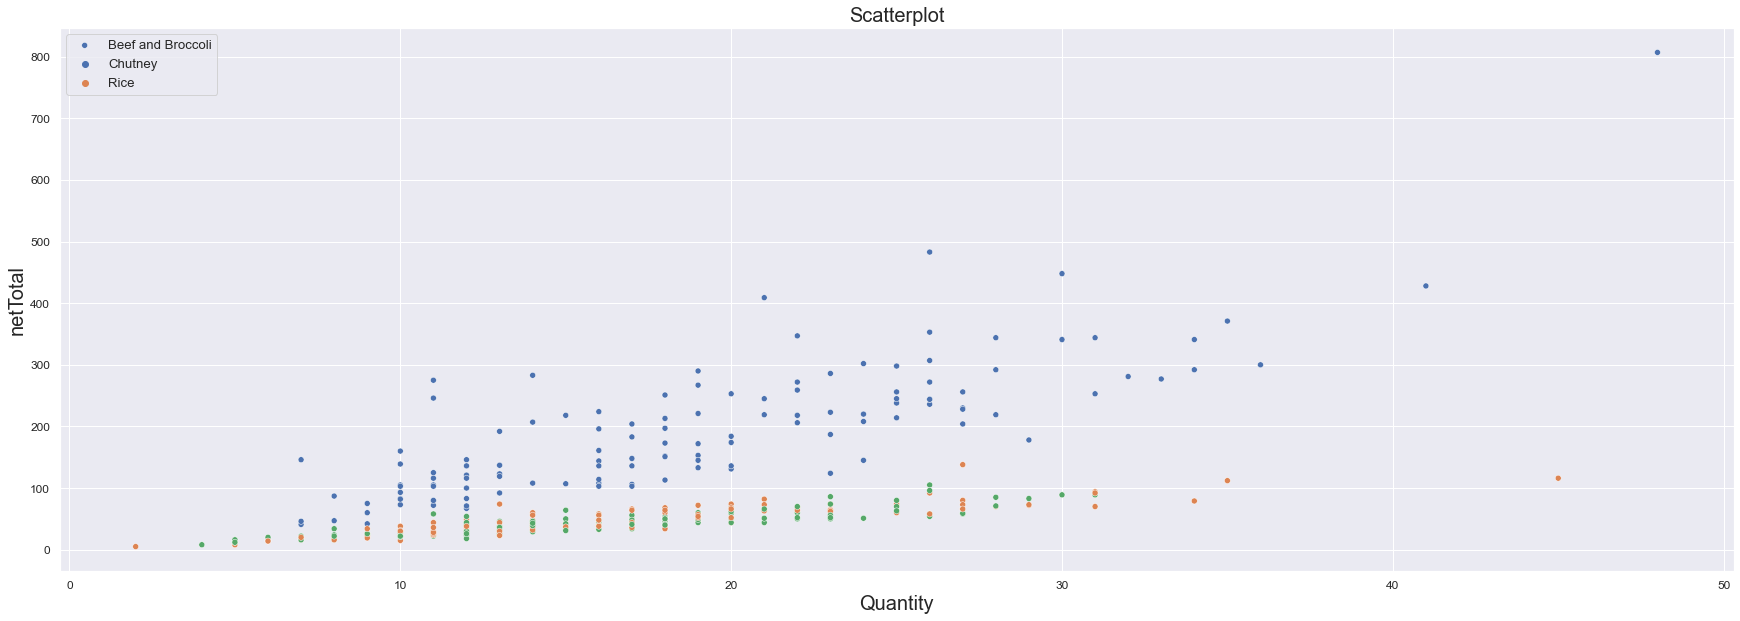

In [16]:
fig = plt.figure(figsize=(30,10))
sns.scatterplot(x=pivottable.quantity,y=pivottable.netTotal,data=pivottable, estimator=None, hue=pivottable.LineItem)
plt.title("Scatterplot", fontsize=20)
plt.xlabel("Quantity", fontsize=20)
plt.ylabel("netTotal", fontsize=20)
plt.legend(['Beef and Broccoli','Chutney','Rice'])
plt.show()

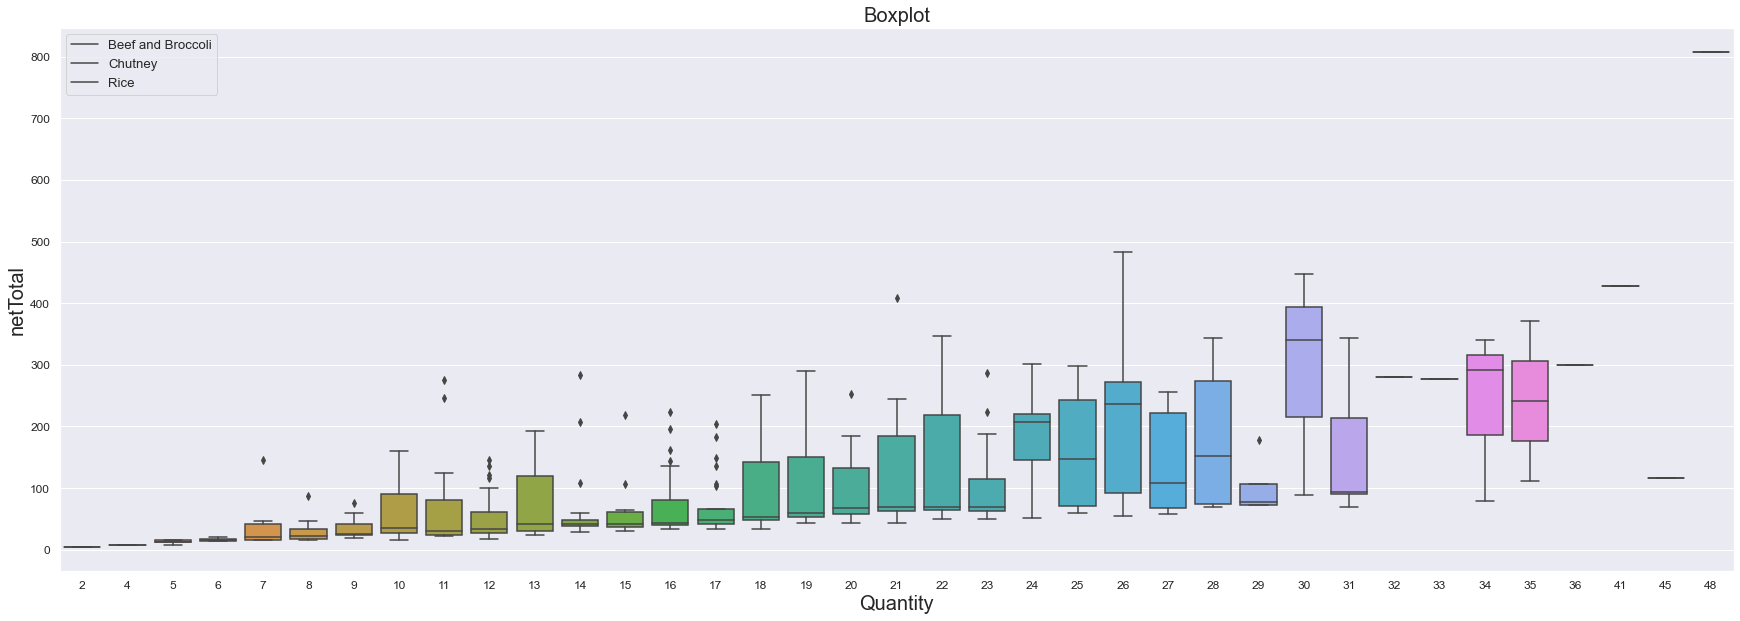

In [17]:
fig = plt.figure(figsize=(30,10))
sns.boxplot(x=pivottable.quantity,y=pivottable.netTotal,data=pivottable, hue_order=pivottable.LineItem)
plt.title("Boxplot", fontsize=20)
plt.xlabel("Quantity", fontsize=20)
plt.ylabel("netTotal", fontsize=20)
plt.legend(['Beef and Broccoli','Chutney','Rice'])
plt.show()

#### Python code done by Dennis Lam